# Plot the example annotation(s)


## Notes on the format

see `annotation-outline.txt` and `out.json`

- some annotations have multiple results
- all masks 4 color channels are identical (re-evaluate on final data)


In [1]:
import sys, os; sys.path += [os.path.join(os.path.expanduser('~'), 'thesis')]  # NOTE hardcoded project root to find shared util modules

import matplotlib.pyplot as plt
import numpy as np
import skimage
import json
import pandas as pd

In [2]:
image = plt.imread("data/third/1.jpg")

_annot = json.load(open('data/third/annotations.json'))

In [3]:
from util.label_studio_converter__brush import *

def preprocess_point(annot):
  '''
    returns: dict: image → numpy instance segmentation mask
  '''

  out = pd.DataFrame()

  for result in annot[0]['annotations'][0]['result']:
    h,w = result['original_height'], result['original_width']
    # rot = result['image_rotation]

    x = result['value']['x']/100 * w
    y = result['value']['y']/100 * h
    s = result['value']['width']

    i = result['to_name']

    out = pd.concat([out, pd.DataFrame(dict(
      x=[x],
      y=[y],
    ))], ignore_index=True)

  return out
annot = preprocess_point(_annot); annot

,x,y
0,29.988146,75.684370
1,51.408251,64.260314
2,55.692272,32.844160
3,19.992098,47.124230
4,8.568042,29.988146
...,...,...
1761,1141.864665,1526.912683
1762,1108.111773,1480.177909
1763,1126.286407,1494.457979
1764,1346.978394,1529.509059


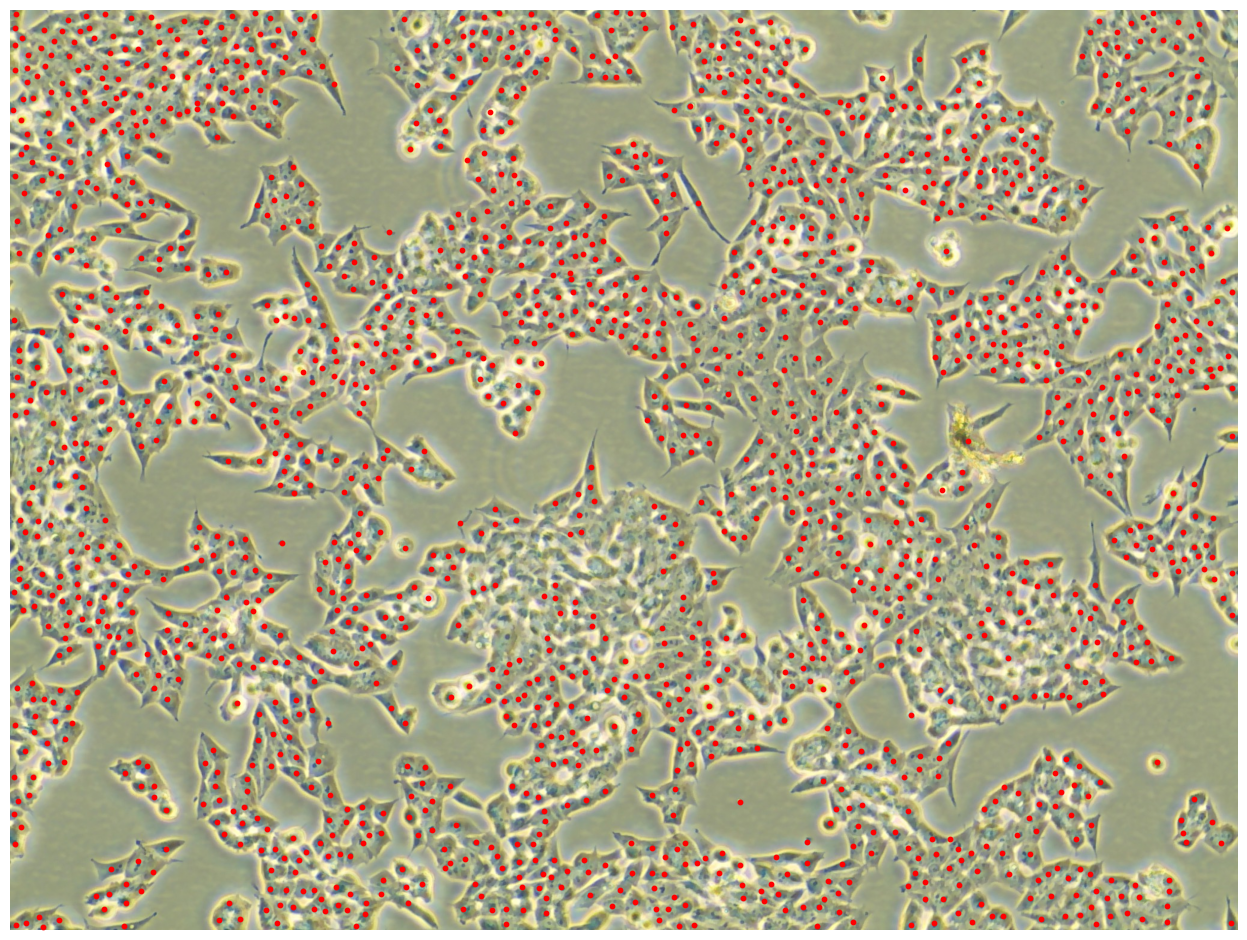

In [4]:

def plot_points(image, points):
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,10))
  plt.tight_layout()
  ax.axis('off')

  ax.imshow(image)
  ax.scatter(points.x, points.y, s=10, c='red', marker='o')

plot_points(image, annot)